# Set Up Environment

In [39]:
# pip install pandas numpy scikit-learn matplotlib seaborn


# Data Preparation

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [41]:
df = pd.read_excel('OnlineRetail.xlsx')

In [42]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# Clean Data

In [43]:
# Remove anomalies
df = df[(df['Quantity']>0)&(df['UnitPrice']>0)]

# Drop rows with missing CustomerID or Description
df = df.dropna(subset=['CustomerID','Description'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Feature Engineering

### Create Total Price:

In [44]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


### Extract Date Features:

In [45]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour


### Encode Categorical Features:

In [46]:
# Convert StockCode and Country columns to strings
df['StockCode'] = df['StockCode'].astype(str)
df['Country'] = df['Country'].astype(str)

# Apply LabelEncoder


label_encoder = LabelEncoder()
df['StockCode'] = label_encoder.fit_transform(df['StockCode'])
df['Country'] = label_encoder.fit_transform(df['Country'])


In [47]:

label_encoder = LabelEncoder()
df['StockCode'] = label_encoder.fit_transform(df['StockCode'])
df['Country'] = label_encoder.fit_transform(df['Country'])


# Define Features and Target
The target variable is Quantity, and the features can include:

StockCode
UnitPrice
TotalPrice
Date-related features (Year, Month, Day, Hour)
Country

In [48]:
# Define features and target
X =df[['StockCode', 'UnitPrice', 'TotalPrice', 'Year', 'Month', 'Day', 'Hour', 'Country']]
y = df['Quantity']


# Split Data into Training and Testing Sets

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Regression Model

### Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 7.600689498120442
Mean Squared Error: 944.0240658579982


# Linear Regression prediction

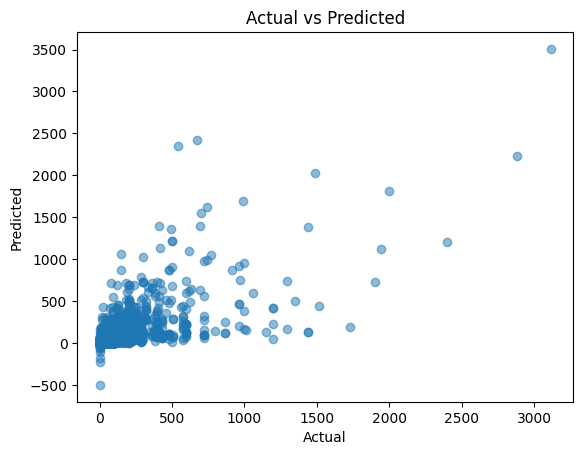

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 0.09702137552307827
Mean Squared Error: 22.58473277831534


# Evaluate and Visualize Results

### Evaluate Metrics

In [63]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.9876732491069661


### Visualize Predictions:

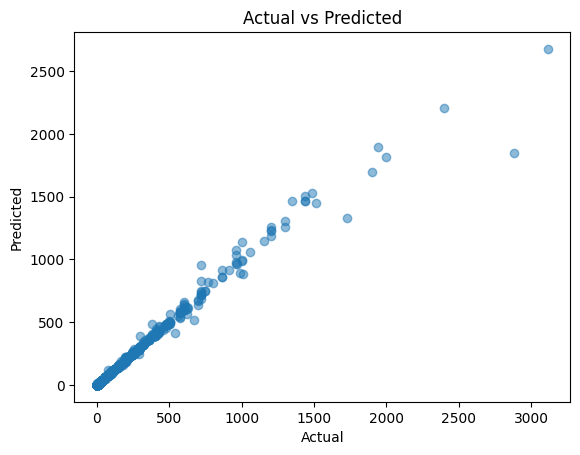

In [64]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


#  Save the Model

In [65]:
import joblib

# Save model
joblib.dump(lr_model, 'demand_prediction_model_lr.pkl')
joblib.dump(rf_model, 'demand_prediction_model_rf.pkl')

# Load model
loaded_model = joblib.load('demand_prediction_model_lr.pkl')
loaded_model = joblib.load('demand_prediction_model_rf.pkl')
